In [111]:
import os
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig
from env.VRPInstance import VRPInstance
from argparse import Namespace
import plotly.graph_objects as go

In [112]:
pd.options.display.float_format = '{:.2f}'.format

In [113]:
print("Initial scores:")
init_scores = {}
for name in ["Antwerp", "Brussels", "Flanders", "Ghent", "Leuven"]:
    for id in [1, 2]:
        key = f"{name}{id}.txt"
        args = Namespace(round_int=False, algo=None, data_folder=f'dataset/train/realworld/{name}')
        instance = VRPInstance.from_path(f"dataset/train/realworld/{name}/{key}", args, key)
        init_score = instance.evaluation(instance.init_solution)
        init_scores[key] = init_score
init_scores = pd.Series(init_scores).to_frame(name="Score")
init_scores

Initial scores:


Score
Antwerp1.txt   2000737.22
Antwerp2.txt   3105857.89
Brussels1.txt  4058149.88
Brussels2.txt  4897693.47
Flanders1.txt 45342113.04
Flanders2.txt 83359929.73
Ghent1.txt     2503948.46
Ghent2.txt     3132093.91
Leuven1.txt     748639.82
Leuven2.txt     986451.14

In [114]:
def load_score(algo, lamb, name):
    df = load_all_scores(f"logs/dataset_train_realworld_{name}_{algo}_{lamb}", [1], [f"{name}1.txt", f"{name}2.txt"])
    best_score = df.applymap(lambda x: min(x))
    return df, best_score

In [115]:
print("HGS scores:")
hgs_antwerp_df, hgs_antwerp = load_score("HGS", 0.1, "Antwerp")
hgs_brussels_df, hgs_brussels = load_score("HGS", 0.1, "Brussels")
hgs_flanders_df, hgs_flanders = load_score("HGS", 0.1, "Flanders")
hgs_ghent_df, hgs_ghent = load_score("HGS", 0.1, "Ghent")
hgs_leuven_df, hgs_leuven = load_score("HGS", 0.1, "Leuven")
best_scores = {}
for instance in [hgs_antwerp, hgs_brussels, hgs_flanders, hgs_ghent, hgs_leuven]:
    for key in instance:
        best_scores[key] = round(instance[key].values[0], 2)
best_scores


HGS scores:


{'Antwerp1.txt': 489366.69,
 'Antwerp2.txt': 299574.69,
 'Brussels1.txt': 522274.81,
 'Brussels2.txt': 360740.94,
 'Flanders1.txt': 7442533.0,
 'Flanders2.txt': 4567691.5,
 'Ghent1.txt': 482491.75,
 'Ghent2.txt': 264490.97,
 'Leuven1.txt': 195906.31,
 'Leuven2.txt': 112974.22}

In [116]:
print("VNS scores:")
vns_antwerp_df, vns_antwerp = load_score("VNS", 0.1, "Antwerp")
vns_brussels_df, vns_brussels = load_score("VNS", 0.1, "Brussels")
vns_flanders_df, vns_flanders = load_score("VNS", 0.1, "Flanders")
vns_ghent_df, vns_ghent = load_score("VNS", 0.1, "Ghent")
vns_leuven_df, vns_leuven = load_score("VNS", 0.1, "Leuven")
best_scores = {}
for instance in [vns_antwerp, vns_brussels, vns_flanders, vns_ghent, vns_leuven]:
    for key in instance:
        best_scores[key] = round(instance[key].values[0], 2)
best_scores

VNS scores:


{'Antwerp1.txt': 490436.25,
 'Antwerp2.txt': 307696.44,
 'Brussels1.txt': 550137.5,
 'Brussels2.txt': 375128.19,
 'Flanders1.txt': 8051525.0,
 'Flanders2.txt': 4920999.5,
 'Ghent1.txt': 492605.41,
 'Ghent2.txt': 275536.41,
 'Leuven1.txt': 196664.69,
 'Leuven2.txt': 114707.71}

In [117]:
def show_init_graphs(data_name):
    print(f"Graph ClockHand - {data_name}")
    n = 2
    width = 180*2*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.05)
    os.makedirs(f"graphs/dataset_train_realworld_{data_name}", exist_ok=True)
    args = Namespace(round_int=False, algo=None, data_folder=f"dataset/train/realworld/{data_name}")
    for i, key in enumerate([1, 2]):
        instance = VRPInstance.from_path(f"dataset/train/realworld/{data_name}/{data_name}{key}.txt", args, f"{data_name}{key}.txt")
        instance.solution = instance.init_solution
        plotly_fig, score = instance.plot(), instance.evaluation(instance.solution)
        plotly_fig.write_image(f"graphs/dataset_train_realworld_{data_name}/{data_name}{key}.pdf")
        title = f"{data_name}{key} - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=width)
    fig.update_traces(line_width=1, marker_size=8)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show('svg')

In [118]:
def show_graphs(algo, lamb, best_scores, data_name):
    print(f"Graph {algo} - {data_name}")
    n = 2
    width = 180*2*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.05)
    os.makedirs(f"graphs/dataset_train_realworld_{data_name}_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(best_scores.keys()):
        plotly_fig, score = instance_fig(best_scores, key, f"dataset/train/realworld/{data_name}")
        plotly_fig.write_image(f"graphs/dataset_train_realworld_{data_name}_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=width)
    fig.update_traces(line_width=1, marker_size=8)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show('svg')

Graph ClockHand - Antwerp


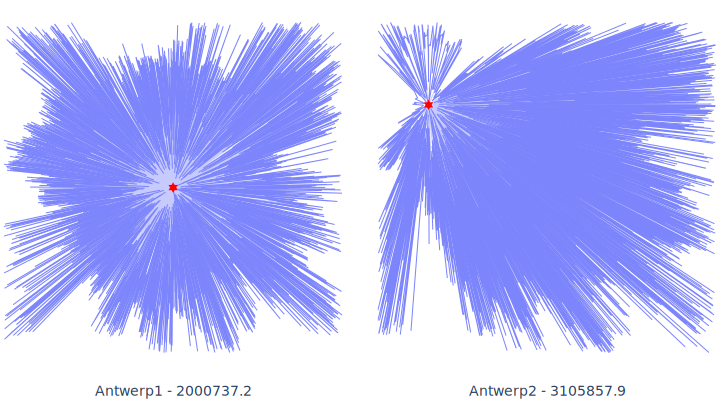

Graph HGS - Antwerp


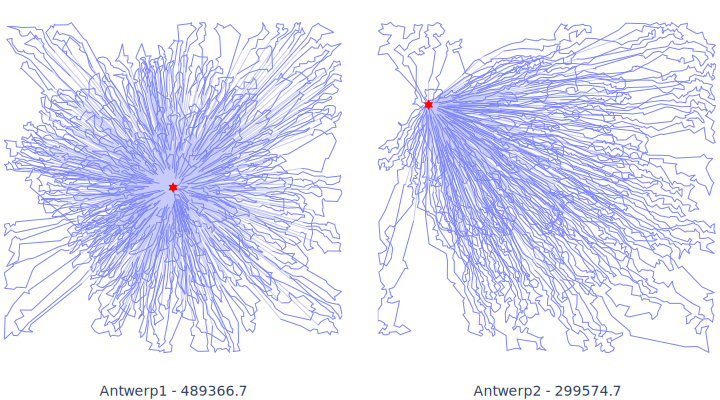

Graph VNS - Antwerp


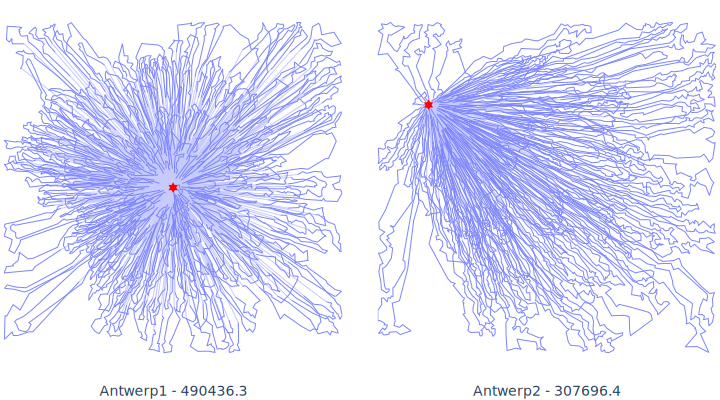

In [119]:
show_init_graphs("Antwerp")
show_graphs("HGS", 0.1, hgs_antwerp, "Antwerp")
show_graphs("VNS", 0.1, vns_antwerp, "Antwerp")

Graph ClockHand - Brussels


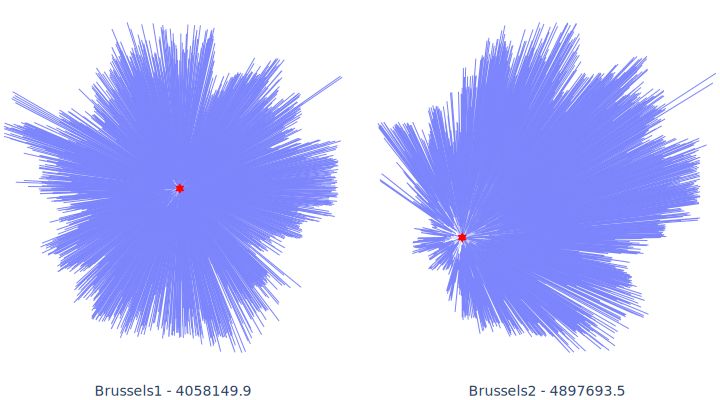

Graph HGS - Brussels


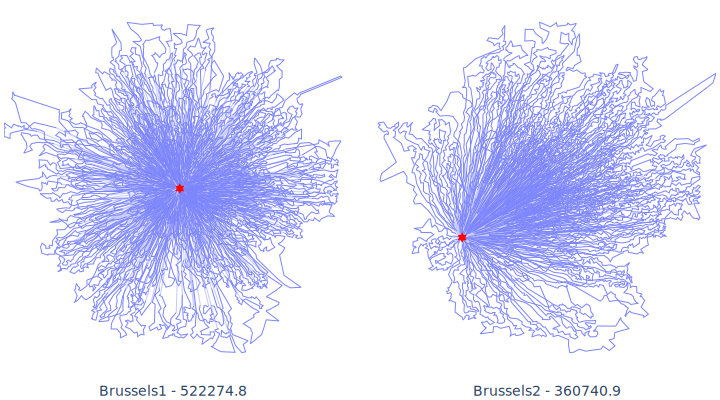

Graph VNS - Brussels


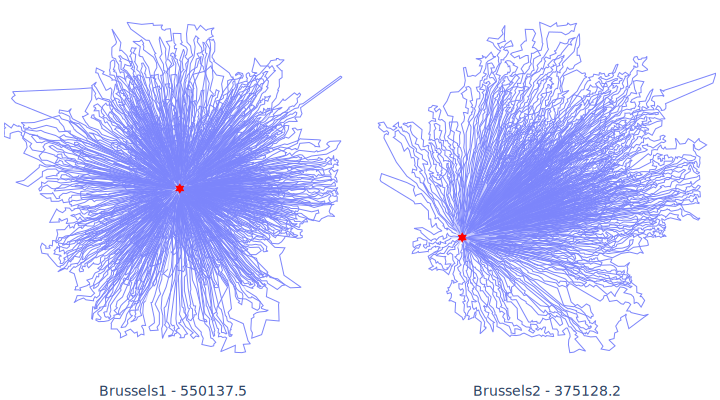

In [120]:
show_init_graphs("Brussels")
show_graphs("HGS", 0.1, hgs_brussels, "Brussels")
show_graphs("VNS", 0.1, vns_brussels, "Brussels")

Graph ClockHand - Flanders


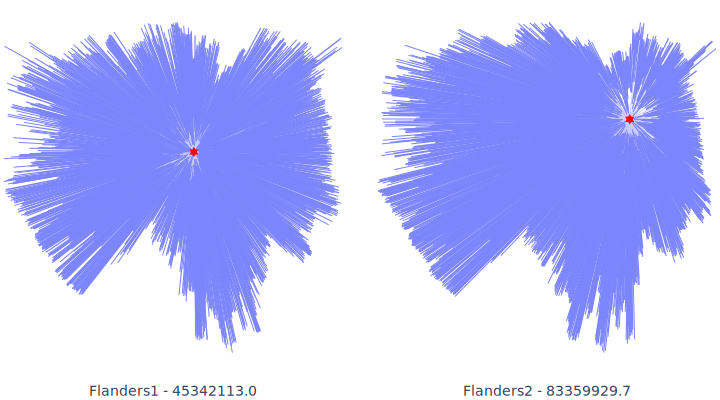

Graph HGS - Flanders


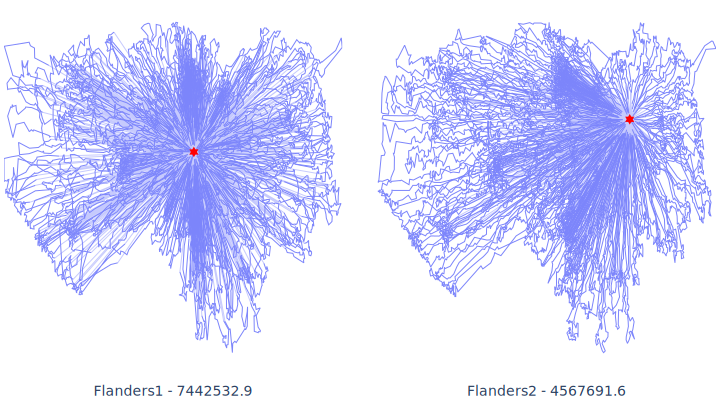

Graph VNS - Flanders


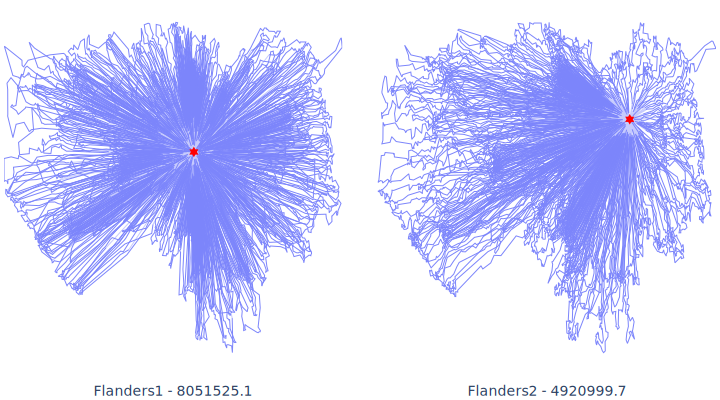

In [121]:
show_init_graphs("Flanders")
show_graphs("HGS", 0.1, hgs_flanders, "Flanders")
show_graphs("VNS", 0.1, vns_flanders, "Flanders")

Graph ClockHand - Ghent


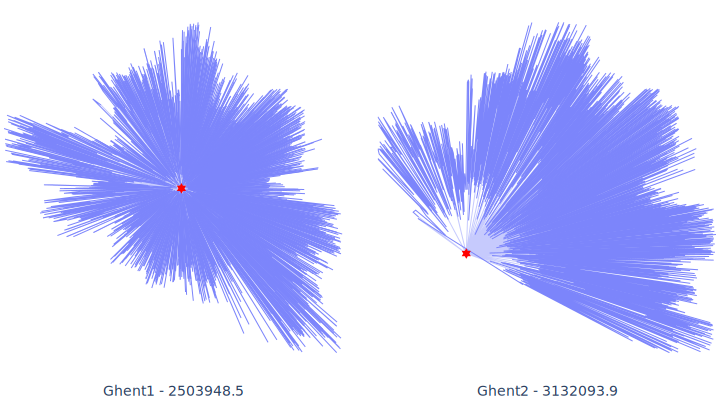

Graph HGS - Ghent


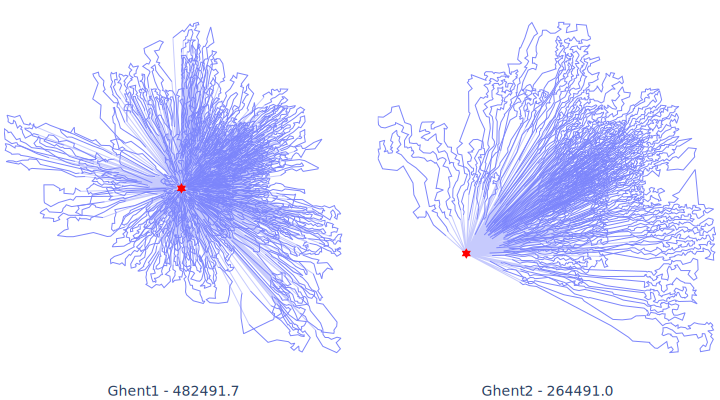

Graph VNS - Ghent


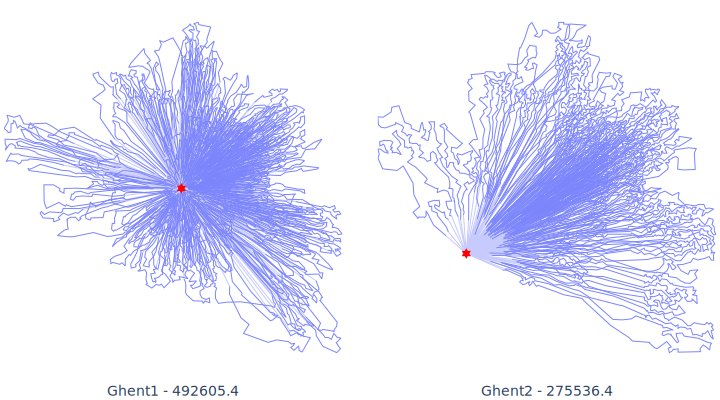

In [122]:
show_init_graphs("Ghent")
show_graphs("HGS", 0.1, hgs_ghent, "Ghent")
show_graphs("VNS", 0.1, vns_ghent, "Ghent")

Graph ClockHand - Leuven


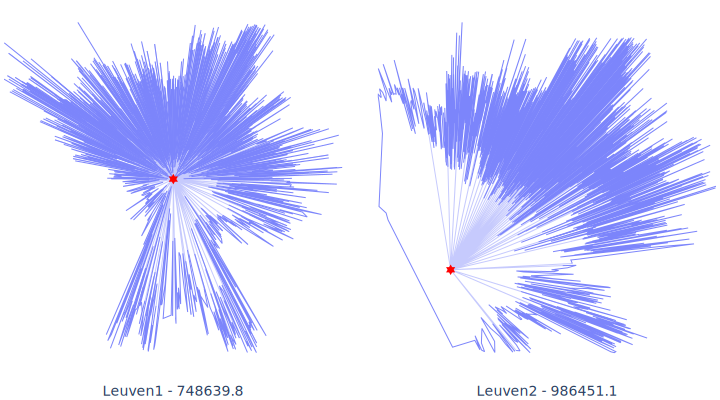

Graph HGS - Leuven


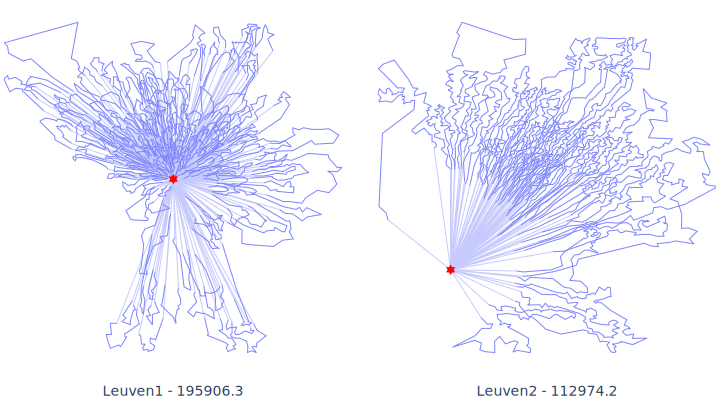

Graph VNS - Leuven


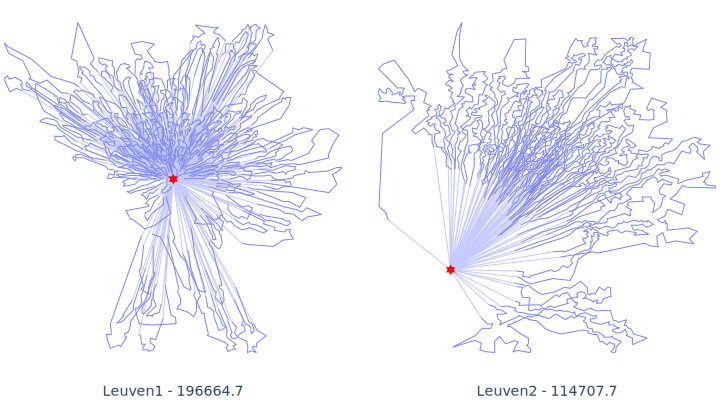

In [123]:
show_init_graphs("Leuven")
show_graphs("HGS", 0.1, hgs_leuven, "Leuven")
show_graphs("VNS", 0.1, vns_leuven, "Leuven")

In [124]:
def create_scatter(data, name, line_color, showlegend):
    data = data.to_numpy().min(-1)
    best_data = []
    for x in data:
        best_data.append(x)
        best_data[-1] = min(best_data)
    data = best_data
    scatter = go.Scatter(x=np.arange(len(data))/len(data), y=data, mode='lines', legendgroup=name, name=name, line_width=2, line_color=line_color, showlegend=showlegend)
    return scatter

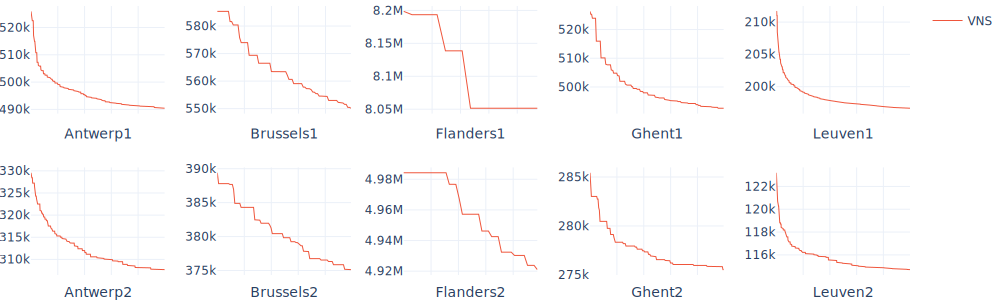

In [125]:
keys = []
for id in [1, 2]:
    for name in ["Antwerp", "Brussels", "Flanders", "Ghent", "Leuven"]:
        key = f"{name}{id}.txt"
        keys.append(key)
df = [hgs_antwerp_df, vns_antwerp_df, hgs_brussels_df, vns_brussels_df, hgs_flanders_df, vns_flanders_df, hgs_ghent_df, vns_ghent_df, hgs_leuven_df, vns_leuven_df]
n = 5
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    vns = create_scatter(df[(i*2+1)%10][key], 'VNS', "#EF553B", i==0)
    fig.append_trace(vns, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".txt")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show("svg")

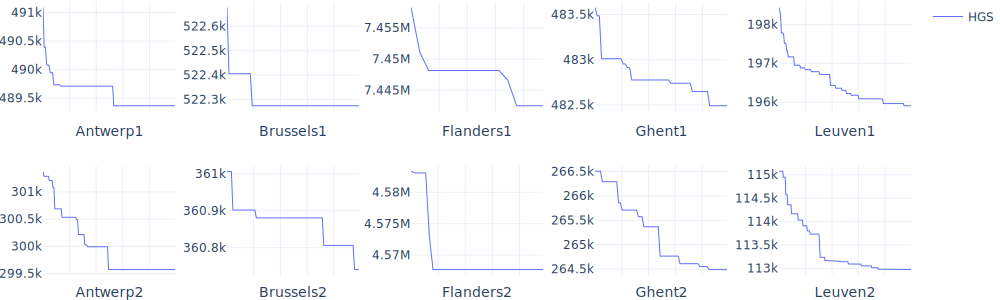

In [126]:
keys = []
for id in [1, 2]:
    for name in ["Antwerp", "Brussels", "Flanders", "Ghent", "Leuven"]:
        key = f"{name}{id}.txt"
        keys.append(key)
df = [hgs_antwerp_df, vns_antwerp_df, hgs_brussels_df, vns_brussels_df, hgs_flanders_df, vns_flanders_df, hgs_ghent_df, vns_ghent_df, hgs_leuven_df, vns_leuven_df]
n = 5
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    hgs = create_scatter(df[(i*2)%10][key], 'HGS', "#636EFA", i==0)
    fig.append_trace(hgs, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".txt")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show("svg")